# Julia 機器學習：GLM 線性迴歸

## 作業 027：波士頓房價預測資料集

請使用 GLM 中的模型，建立一個預測模型來預測波士頓的房價。

In [57]:
using GLM, RDatasets, MLDataUtils, Statistics, StatsPlots, MLDataUtils

## 讀取資料

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

The data was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

### Dataset Naming

The name for this dataset is simply boston. It has two prototasks: **`nox`**, in which the nitrous oxide level is to be predicted; and **`price`**, in which the median value of a home is to be predicted

### Miscellaneous Details
#### Origin  
The origin of the boston housing data is **Natural**.
    
#### Usage
This dataset may be used for Assessment.

#### Number of Cases
The dataset contains a total of **506** cases.
    
#### Order  
The order of the cases is **mysterious**.

#### Variables  
There are 14 attributes in each case of the dataset. They are:

1. `CRIM` - per capita crime rate by town
2. `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
3. `INDUS` - proportion of non-retail business acres per town.
4. `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. `NOX` - nitric oxides concentration (parts per 10 million)
6. `RM` - average number of rooms per dwelling
7. `AGE` - proportion of owner-occupied units built prior to 1940
8. `DIS` - weighted distances to five Boston employment centres
9. `RAD` - index of accessibility to radial highways
10. `TAX` - full-value property-tax rate per \\$10,000
11. `PTRATIO` - pupil-teacher ratio by town
12. `B` - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. `LSTAT` - % lower status of the population
14. `MEDV` - Median value of owner-occupied homes in \\$1000's

#### Note  
Variable #14 seems to be censored at 50.00 (corresponding to a median price of \\$50,000); Censoring is suggested by the fact that the highest median price of exactly \\$50,000 is reported in 16 cases, while 15 cases have prices between \\$40,000 and \\$50,000, with prices rounded to the nearest hundred. Harrison and Rubinfeld do not mention any censoring.

In [5]:
boston = dataset("MASS", "Boston")
first(boston, 10)

,Crim,Zn,Indus,Chas,NOx,Rm,Age,Dis,Rad,Tax
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Int64
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222
6,0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3,222
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311


In [6]:
summary(boston)

"506×14 DataFrame"

In [7]:
# Check for missing values
describe(boston)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing,DataType
1,Crim,3.61352,0.00632,0.25651,88.9762,,,Float64
2,Zn,11.3636,0.0,0.0,100.0,,,Float64
3,Indus,11.1368,0.46,9.69,27.74,,,Float64
4,Chas,0.06917,0,0.0,1,,,Int64
5,NOx,0.554695,0.385,0.538,0.871,,,Float64
6,Rm,6.28463,3.561,6.2085,8.78,,,Float64
7,Age,68.5749,2.9,77.5,100.0,,,Float64
8,Dis,3.79504,1.1296,3.20745,12.1265,,,Float64
9,Rad,9.54941,1,5.0,24,,,Int64


In [9]:
using LinearAlgebra

In [12]:
function correlation_matrix(df::DataFrame)::Array{Float64,2}
    reshape([cor(df[:, name1], df[:, name2]) 
         for name1 in names(df) 
             for name2 in names(df)],
        ncol(df), :)
end

boston_corr_mat = correlation_matrix(boston);
UpperTriangular(boston_corr_mat)

14×14 UpperTriangular{Float64,Array{Float64,2}}:
 1.0  -0.200469   0.406583  -0.0558916  …  -0.385064    0.455621   -0.388305
  ⋅    1.0       -0.533828  -0.0426967      0.17552    -0.412995    0.360445
  ⋅     ⋅         1.0        0.062938      -0.356977    0.6038     -0.483725
  ⋅     ⋅          ⋅         1.0            0.0487885  -0.0539293   0.17526
  ⋅     ⋅          ⋅          ⋅            -0.380051    0.590879   -0.427321
  ⋅     ⋅          ⋅          ⋅         …   0.128069   -0.613808    0.69536
  ⋅     ⋅          ⋅          ⋅            -0.273534    0.602339   -0.376955
  ⋅     ⋅          ⋅          ⋅             0.291512   -0.496996    0.249929
  ⋅     ⋅          ⋅          ⋅            -0.444413    0.488676   -0.381626
  ⋅     ⋅          ⋅          ⋅            -0.441808    0.543993   -0.468536
  ⋅     ⋅          ⋅          ⋅         …  -0.177383    0.374044   -0.507787
  ⋅     ⋅          ⋅          ⋅             1.0        -0.366087    0.333461
  ⋅     ⋅          ⋅         

In [43]:
hight_corr_ind = (boston_corr_mat[1:end-1, end] .> 0.5) .| (boston_corr_mat[1:end-1, end] .< -0.5) |> findall

3-element Array{Int64,1}:
  6
 11
 13

In [45]:
names(boston)[hight_corr_ind]

3-element Array{Symbol,1}:
 :Rm
 :PTRatio
 :LStat

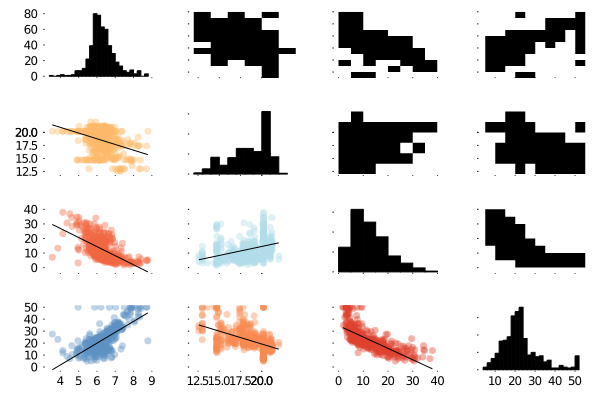

In [51]:
corrplot(Array(boston[:, [:Rm, :PTRatio, :LStat, :MedV]]), grid = false)

In [75]:
index = MLDataUtils.shuffleobs(collect(1:nrow(boston)));
train_index, test_index = MLDataUtils.splitobs(index);
train, test = boston[train_index, :], boston[test_index, :];

In [77]:
used_formula = @formula(MedV ~ Rm + PTRatio + LStat)
model = GLM.lm(used_formula, train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

MedV ~ 1 + Rm + PTRatio + LStat

Coefficients:
─────────────────────────────────────────────────────────────────────────────
              Estimate  Std. Error    t value  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  15.7437     4.50553      3.49431    0.0005    6.88241  24.6051
Rm            4.95938    0.49805      9.9576     <1e-20    3.97983   5.93893
PTRatio      -0.970787   0.133607    -7.26599    <1e-11   -1.23356  -0.708013
LStat        -0.513986   0.0472064  -10.8881     <1e-23   -0.60683  -0.421142
─────────────────────────────────────────────────────────────────────────────

In [78]:
rmse(y, y_hat) = sqrt(mean((y-y_hat).^2))
y_hat = predict(model, test)
println("R\u00B2 = $(GLM.r2(model))")
println("RMSE = $(rmse(test.MedV, y_hat))")

R² = 0.7101455604271131
RMSE = 5.837389946632251


use another train set

In [79]:
index = MLDataUtils.shuffleobs(collect(1:nrow(boston)));
train_index, test_index = MLDataUtils.splitobs(index);
train, test = boston[train_index, :], boston[test_index, :];

In [80]:
used_formula = @formula(MedV ~ Rm + PTRatio + LStat)
model = GLM.lm(used_formula, train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

MedV ~ 1 + Rm + PTRatio + LStat

Coefficients:
─────────────────────────────────────────────────────────────────────────────
              Estimate  Std. Error    t value  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  19.3808     4.46216      4.34337    <1e-4   10.6048    28.1568
Rm            4.11842    0.481464     8.55395    <1e-15   3.17149    5.06534
PTRatio      -0.856687   0.143226    -5.98138    <1e-8   -1.13838   -0.574996
LStat        -0.551633   0.0486521  -11.3383     <1e-24  -0.647321  -0.455946
─────────────────────────────────────────────────────────────────────────────

In [81]:
rmse(y, y_hat) = sqrt(mean((y-y_hat).^2))
y_hat = predict(model, test)
println("R\u00B2 = $(GLM.r2(model))")
println("RMSE = $(rmse(test.MedV, y_hat))")

R² = 0.6574617436186592
RMSE = 5.3287986031903465


# References:
- [bostonDetail](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)
- [Introducing Julia/DataFrames](https://en.wikibooks.org/wiki/Introducing_Julia/DataFrames)
- [Github: StatsPlots.jl](https://github.com/JuliaPlots/StatsPlots.jl)
- [SO: Plotting correlation scatter matrix plot in Julia](https://stackoverflow.com/questions/39644279/plotting-correlation-scatter-matrix-plot-in-julia)